## Getting the data

### Cryptocurrencies data from CoinGecko API wrapper

In [11]:
# !pip install coingecko
from pycoingecko import CoinGeckoAPI
import numpy as np
import pandas as pd
from time import sleep
import time
import matplotlib.pyplot as plt
import datetime
import seaborn as sns

#### get_coins_markets()

#### This function returns top 100 cryptocurrencies

In [16]:
cg = CoinGeckoAPI()
# getting the 100 most important currencies
coins = cg.get_coins_markets(vs_currency='eur')

In [17]:
coins_now = pd.DataFrame(coins).drop(['symbol', 'name', 'image', 'market_cap_rank', 'market_cap_change_24h', 'fully_diluted_valuation', 'price_change_24h', 'high_24h', 'low_24h', 'roi', 'last_updated', 'ath', 'atl'], axis=1)
coins_now.head(5)

,id,current_price,market_cap,total_volume,price_change_percentage_24h,market_cap_change_percentage_24h,circulating_supply,total_supply,max_supply,ath_change_percentage,ath_date,atl_change_percentage,atl_date
0,bitcoin,43186.000000,816281527474,2.580206e+10,2.24962,2.25422,1.890145e+07,2.100000e+07,21000000.0,-27.68171,2021-11-10T14:24:11.849Z,8.408622e+04,2013-07-05T00:00:00.000Z
1,ethereum,3451.870000,409898770795,1.704144e+10,1.83640,1.61016,1.187469e+08,NaN,NaN,-18.37490,2021-12-01T08:38:24.623Z,9.048206e+05,2015-10-20T00:00:00.000Z
2,binancecoin,474.040000,79703554818,1.738031e+09,-0.01857,-0.19470,1.681370e+08,1.681370e+08,168137035.9,-18.71392,2021-11-26T02:58:28.000Z,1.410756e+06,2017-10-19T00:00:00.000Z
3,tether,0.890541,68936902744,5.709035e+10,0.02231,-0.04228,7.741017e+10,7.741017e+10,NaN,-21.30250,2018-07-24T00:00:00.000Z,6.705084e+01,2015-03-02T00:00:00.000Z
4,solana,148.570000,45919025384,1.947356e+09,6.79869,7.63526,3.077909e+08,5.081810e+08,NaN,-33.98267,2021-11-06T21:54:35.825Z,3.197699e+04,2020-05-11T19:35:23.449Z


In [ ]:
coins_now.to_csv('coins_now.csv', index = False)

In [ ]:
coins_list = list(coins_now.id)

# I drop some coins because they dont provide useful information (stable coins or based on other coins)
stable_coins = ['tether', 'usd-coin', 'binance-usd', 'dai', 'cdai', 'terrausd', 'magic-internet-money', 'compound-usd-coin']
del_coins = ['staked-ether', 'compound-ether', 'wrapped-bitcoin']
def remove_all_by_values(list_obj, values):
    for value in values:
        list_obj.remove(value)
    return list_obj
coins_list = remove_all_by_values(coins_list, stable_coins)
coins_list = remove_all_by_values(coins_list, del_coins)


#### get_coin_by_id()

#### This function returns some actual information (not used)

In [ ]:
# key to extract from dictionary 
key_to_extract = {'id', 'symbol','name', 'sentiment_votes_up_percentage', 'sentiment_votes_down_percentage', 'market_cap_rank', 'coingecko_score', 'developer_score', 'community_score', 'liquidity_score', 'public_interest_score', 'market_data', 'community_data', 'public_interest_stats'}
coins_df = pd.DataFrame()
# getting info about top 50 coins
for i in range(0, 50):
    # this API throws an error every 10-20 returns randomly
    # this mecanism avoids error interruptions
    while True:
            try:
                extracted_dict = {key: cg.get_coin_by_id(id = coins_list[i])[key] for key in cg.get_coin_by_id(id = coins_list[i]).keys() & key_to_extract}
            except:
                sleep(5)
            else:
                extracted_dict['current_price'] = extracted_dict.get("market_data").get("current_price").get("eur")
                df = pd.DataFrame(extracted_dict.items()).transpose()
                df = df.rename(columns=df.iloc[0]).iloc[1: , :].drop(['market_data'], axis=1)
                coins_df = pd.concat([coins_df, df], axis=0)


In [199]:
coins_df = pd.concat([coins_df.drop(['public_interest_stats'], axis=1), coins_df['public_interest_stats'].apply(pd.Series)], axis=1)
coins_df = pd.concat([coins_df.drop(['community_data'], axis=1), coins_df['community_data'].apply(pd.Series)], axis=1)

In [204]:
coins_df.head(5)

,id,market_cap_rank,symbol,liquidity_score,sentiment_votes_up_percentage,public_interest_score,developer_score,sentiment_votes_down_percentage,community_score,name,...,current_price,alexa_rank,bing_matches,facebook_likes,twitter_followers,reddit_average_posts_48h,reddit_average_comments_48h,reddit_subscribers,reddit_accounts_active_48h,telegram_channel_user_count
1,bitcoin,1,btc,100.247,64.89,0.0,98.876,35.11,70.897,Bitcoin,...,42924,9440.0,NaN,NaN,3957201.0,6.273,776.545,3651547.0,3567.0,NaN
1,ethereum,2,eth,97.991,84.27,0.0,97.351,15.73,61.678,Ethereum,...,3721.07,8793.0,NaN,NaN,1946371.0,7.000,230.200,1177652.0,1044.0,NaN
1,binancecoin,3,bnb,78.274,83.05,0.0,73.187,16.95,62.85,Binance Coin,...,512.24,888.0,NaN,NaN,6520341.0,8.900,190.700,736533.0,692.0,NaN
1,tether,4,usdt,105.444,62.76,0.0,0.0,37.24,11.055,Tether,...,0.883475,74251.0,NaN,NaN,178543.0,0.000,0.000,0.0,0.0,NaN
1,solana,5,sol,82.578,67.64,0.0,88.596,32.36,54.942,Solana,...,163.96,83508.0,NaN,NaN,1085079.0,8.273,128.364,105292.0,334.0,100175.0


In [ ]:
coins_df.to_csv('coins_df.csv')

#### get_coin_history_by_id()

#### This function returns historical community data

In [ ]:
# key to extract from dictionary 
key_to_extract = {'id', 'community_data'}
community_data = pd.DataFrame()
date_list = [pd.to_datetime('01-01-2020') + datetime.timedelta(days=x) for x in range(713)]
# getting info about top 25 coins
for i in range(0,25):
    for date in date_list:
        # this API throws an error every 10-20 returns randomly
        # this mecanism avoids error interruptions
        while True:
            try:
                extracted_dict = {key: cg.get_coin_history_by_id(id = coins_list[i], date=date.strftime("%d-%m-%Y"))[key] for key in cg.get_coin_history_by_id(id = coins_list[i], date=date.strftime("%d-%m-%Y")).keys() & key_to_extract}
            except:
                sleep(5)
            else:
                if len(extracted_dict)>1:
                    df = pd.DataFrame(extracted_dict.items()).transpose()
                    df = df.rename(columns=df.iloc[0]).iloc[1: , :]
                    df = df.community_data.apply(pd.Series).merge(df['id'], left_index = True, right_index = True).melt(id_vars = ['id'], value_name = "community_data")
                    df['date'] = date.strftime("%d-%m-%Y")
                    community_data = pd.concat([community_data, df], axis=0)
                break
        print(coins_list[i]," - ",date.strftime("%d-%m-%Y"))
        


In [ ]:
# transforming data 
community_data = community_data.pivot_table(index= ['date', 'id'], columns=['variable'], aggfunc='first').reset_index()
community_data.columns = community_data.columns.droplevel()
community_data.columns = ['date', 'id', *community_data.columns[2:]]
community_data.date = pd.to_datetime(community_data.date)

In [235]:
community_data

,date,id,reddit_accounts_active_48h,reddit_average_comments_48h,reddit_average_posts_48h,reddit_subscribers,twitter_followers
0,2020-01-01,binancecoin,685.5,1.0,0.273,58170,1079637
1,2020-01-01,bitcoin,4778.41666666667,262.727,7.182,1232212,68375
2,2020-01-01,ethereum,1502.08333333333,38.0,2.909,448980,448592
3,2021-01-01,binancecoin,1102.33333333333,42.182,7.636,83484,1438180
4,2021-01-01,bitcoin,9021.53846153846,975.917,6.25,1864490,74537
...,...,...,...,...,...,...,...
2134,2021-10-31,bitcoin,5454.15384615385,1001.083,5.833,3495487,3566085
2135,2021-10-31,ethereum,1344.66666666667,184.0,7.0,1136300,1749618
2136,2020-12-31,binancecoin,983.769230769231,50.667,8.417,83282,1435421
2137,2020-12-31,bitcoin,8271.30769230769,936.0,6.75,1861930,74532


#### get_coin_market_chart_range_by_id()

#### This function returns historical price data

In [ ]:
# getting historical prices and market_caps of each coin
def trans_date(value):
    return (time.strftime("%Y-%m-%d", time.gmtime(value/1000)))

key_to_extract = {'prices'}
coins_hist = pd.DataFrame()
# getting info about top 50 coins
for i in range(0,50):
    # this API throws an error every 10-20 returns randomly
    # this mecanism avoids error interruptions
    while True:
            try:
                extracted_dict = {key: cg.get_coin_market_chart_range_by_id(id = coins_list[i], vs_currency='eur', from_timestamp='1483225200', to_timestamp='1639090800')[key] for key in cg.get_coin_market_chart_range_by_id(id = coins_list[i], vs_currency='eur', from_timestamp='1483225200', to_timestamp='1633989600').keys() & key_to_extract}
            except:
                sleep(5)
            else:
                df = pd.DataFrame(extracted_dict.items()).transpose()
                df = df.rename(columns=df.iloc[0]).iloc[1: , :]
                df['id'] = coins_list[i]
                df_prices = df.prices.apply(pd.Series).merge(df['id'], left_index = True, right_index = True).melt(id_vars = ['id'], value_name = "prices").drop("variable", axis = 1)
                df_prices['date'] = df_prices['prices'].str[0]
                df_prices['prices'] = df_prices['prices'].str[1]
                df_prices['date'] = df_prices['date'].apply(trans_date)
                coins_hist = pd.concat([coins_hist, df_prices], axis=0)
                break
    print(coins_list[i])

In [164]:
# transforming data 
coins_hist_prices = coins_hist.pivot_table(index= ['date'], columns=['id'], values = ['prices']).reset_index()
coins_hist_prices.columns = coins_hist_prices.columns.droplevel()
coins_hist_prices.columns = ['date', *coins_hist_prices.columns[1:]]
coins_hist_prices.date = pd.to_datetime(coins_hist_prices.date)
coins_hist_prices.columns = coins_hist_prices.columns.str.replace('-', '_')
coins_hist_prices

,date,algorand,avalanche_2,axie_infinity,binancecoin,bitcoin,bitcoin_cash,bittorrent_2,cardano,chainlink,...,solana,stellar,terra_luna,tezos,the_graph,the_sandbox,theta_token,tron,uniswap,vechain
0,2017-01-01,NaN,NaN,NaN,NaN,948.743300,NaN,NaN,NaN,NaN,...,NaN,0.002359,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-01-02,NaN,NaN,NaN,NaN,973.780200,NaN,NaN,NaN,NaN,...,NaN,0.002391,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-01-03,NaN,NaN,NaN,NaN,994.315600,NaN,NaN,NaN,NaN,...,NaN,0.002445,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2017-01-04,NaN,NaN,NaN,NaN,1078.339639,NaN,NaN,NaN,NaN,...,NaN,0.002605,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2017-01-05,NaN,NaN,NaN,NaN,934.261900,NaN,NaN,NaN,NaN,...,NaN,0.002438,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1799,2021-12-05,1.456781,81.636887,104.106361,501.369726,43452.366271,415.246475,0.002308,1.254308,18.152414,...,177.604188,0.255954,67.129411,3.651940,0.646248,5.319371,4.548825,0.076860,15.165767,0.085248
1800,2021-12-06,1.545328,75.783768,94.818492,491.696726,43584.415788,400.257578,0.002185,1.217181,17.138638,...,173.838697,0.249118,60.191287,3.421268,0.607996,4.793368,4.177204,0.074622,14.598511,0.079651
1801,2021-12-07,1.587568,82.339813,93.948477,521.502719,44721.774318,420.936333,0.002987,1.256403,17.566595,...,171.837323,0.263084,59.308712,3.708539,0.624258,4.878928,4.252915,0.077578,15.389748,0.083345
1802,2021-12-08,1.498819,79.761242,93.917669,513.203737,44927.870835,420.340803,0.003413,1.227976,18.456450,...,168.873226,0.255513,61.332790,4.968624,0.611670,4.717021,4.149745,0.080373,15.241993,0.081731


In [146]:
coins_hist_prices.to_csv('coins_hist_prices.csv', index = False)

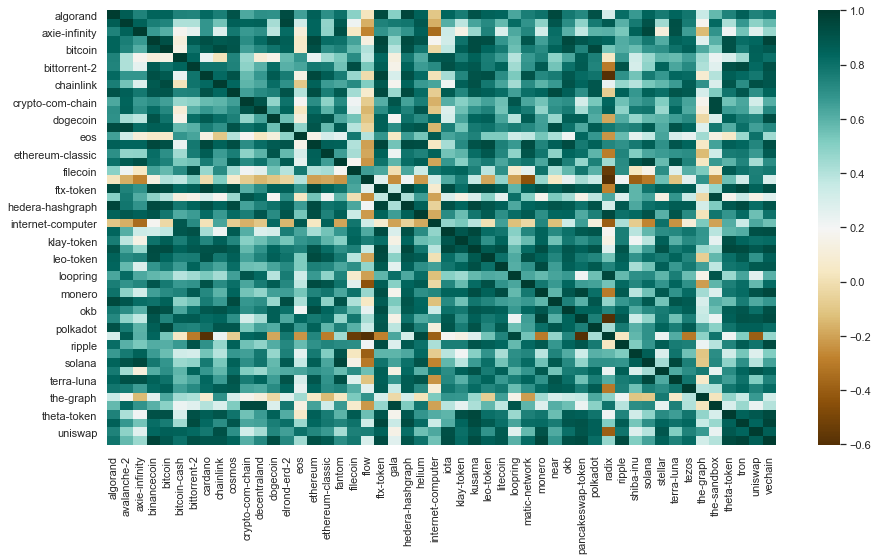

In [34]:
correlations_matrix = coins_hist_prices.corr()
sns.heatmap(correlations_matrix, annot=False, cmap='BrBG')
sns.set(rc = {'figure.figsize':(15,10)})
plt.show()

In [35]:
# difficult to see the values of correlations in the heatmap
# I put them in a table
s = correlations_matrix.unstack()
so = s.sort_values(kind="quicksort")
so = pd.DataFrame(so)
so = so.reset_index()
so.columns=['coin1', 'coin2', 'corr']
so[(so['corr']>0.95) & (so['corr']<1)]

,coin1,coin2,corr
2406,iota,kusama,0.950007
2407,kusama,iota,0.950007
2408,solana,terra-luna,0.950022
2409,terra-luna,solana,0.950022
2410,hedera-hashgraph,kusama,0.950282
2411,kusama,hedera-hashgraph,0.950282
2412,loopring,radix,0.950671
2413,radix,loopring,0.950671
2414,monero,vechain,0.951027
2415,vechain,monero,0.951027


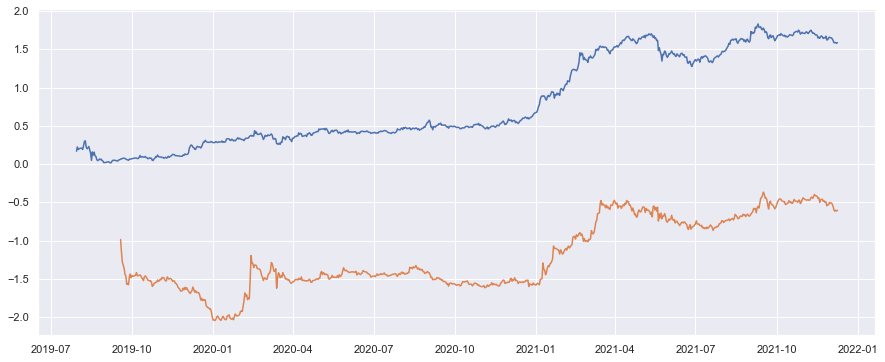

In [36]:
plt.figure(figsize=(15,6))
plt.plot(coins_hist_prices['date'],coins_hist_prices['ftx-token'].apply(lambda x:np.log10(x) if x>0 else x))
plt.plot(coins_hist_prices['date'],coins_hist_prices['hedera-hashgraph'].apply(lambda x:np.log10(x) if x>0 else x))
plt.show()

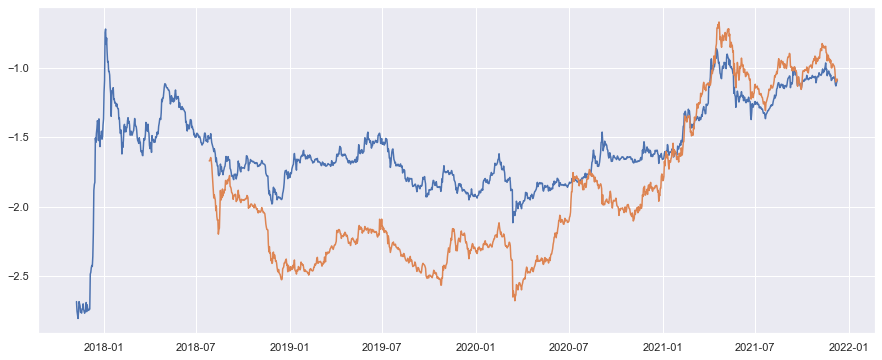

In [37]:
plt.figure(figsize=(15,6))
plt.plot(coins_hist_prices['date'],coins_hist_prices['tron'].apply(lambda x:np.log10(x) if x>0 else x))
plt.plot(coins_hist_prices['date'],coins_hist_prices['vechain'].apply(lambda x:np.log10(x) if x>0 else x))
plt.show()

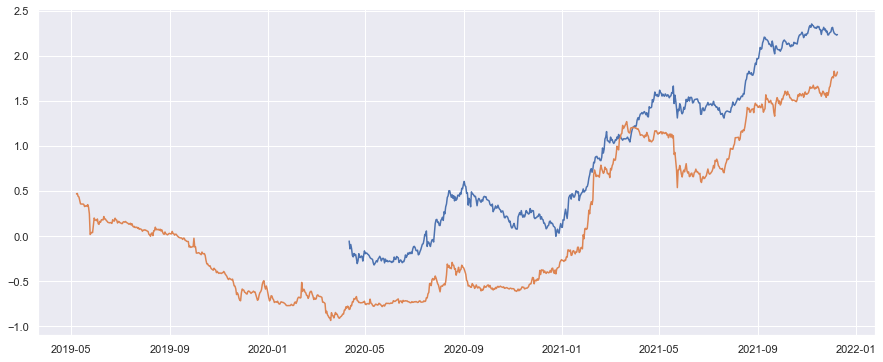

In [40]:
plt.figure(figsize=(15,6))
plt.plot(coins_hist_prices['date'],coins_hist_prices['solana'].apply(lambda x:np.log10(x) if x>0 else x))
plt.plot(coins_hist_prices['date'],coins_hist_prices['terra-luna'].apply(lambda x:np.log10(x) if x>0 else x))
plt.show()

### Traditional Stock markets from Yahoo Finance API

In [ ]:
#!pip install yahoo_fin

In [41]:
from bs4 import BeautifulSoup
import requests
from yahoo_fin.stock_info import get_data

In [42]:
# First of all, web scraping to get the list of World Indices
response = requests.get('https://finance.yahoo.com/world-indices')
response.status_code # 200 status code means OK!

200

In [43]:
soup = BeautifulSoup(response.content, "html.parser")

index = []
for i in range(1,37,1):
    start_at= str(i)
    selector = "tr:nth-child("
    selector += start_at + ") a"
    
    index.append(str.strip(soup.select(selector)[0].get_text()))

In [44]:
# using the yahoo_fin API to get the historical data
world_indices = pd.DataFrame()
for i in range(0, len(index)):
    try:
        world_indices = pd.concat([world_indices, get_data(index[i], start_date="01/01/2017", end_date="12/10/2021", index_as_date = False, interval="1d")], axis=0)
    except:
        pass
world_indices

,date,open,high,low,close,adjclose,volume,ticker
0,2017-01-03,2251.570068,2263.879883,2245.129883,2257.830078,2257.830078,3.770530e+09,^GSPC
1,2017-01-04,2261.600098,2272.820068,2261.600098,2270.750000,2270.750000,3.764890e+09,^GSPC
2,2017-01-05,2268.179932,2271.500000,2260.449951,2269.000000,2269.000000,3.761820e+09,^GSPC
3,2017-01-06,2271.139893,2282.100098,2264.060059,2276.979980,2276.979980,3.339890e+09,^GSPC
4,2017-01-09,2273.590088,2275.489990,2268.899902,2268.899902,2268.899902,3.217610e+09,^GSPC
...,...,...,...,...,...,...,...,...
1051,2021-12-03,4343.240234,4398.350098,4292.850098,4292.850098,4292.850098,0.000000e+00,^JN0U.JO
1052,2021-12-06,4305.930176,4379.750000,4295.450195,4373.100098,4373.100098,0.000000e+00,^JN0U.JO
1053,2021-12-07,4405.919922,4502.379883,4404.859863,4502.379883,4502.379883,0.000000e+00,^JN0U.JO
1054,2021-12-08,4508.169922,4525.339844,4478.529785,4516.910156,4516.910156,0.000000e+00,^JN0U.JO


In [45]:
# transforming the data
world_indices = world_indices.rename({'ticker':'world_indices_ticker'}, axis=1)
world_indices.date = pd.to_datetime(world_indices.date)
world_indices = world_indices[['date', 'close', 'world_indices_ticker']]
world_indices = world_indices.pivot_table(index= ['date'], columns=['world_indices_ticker'], values = ['close']).reset_index()
world_indices.columns = world_indices.columns.droplevel()
world_indices.columns = ['date', *world_indices.columns[1:]]
world_indices

,date,000001.SS,399001.SZ,IMOEX.ME,^AORD,^AXJO,^BFX,^BSESN,^BUK100P,^BVSP,...,^N225,^NYA,^NZ50,^RUT,^STI,^STOXX50E,^TA125.TA,^TWII,^VIX,^XAX
0,2017-01-02,NaN,NaN,NaN,5784.600098,5733.200195,NaN,26595.449219,709.169983,59589.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1280.420044,NaN,NaN,NaN
1,2017-01-03,3135.920898,10262.849609,2285.429932,5788.200195,5736.399902,3657.050049,26643.240234,715.390015,61814.0,...,NaN,11154.349609,6974.310059,1365.489990,2898.969971,3315.020020,1285.439941,9272.879883,12.850000,2325.129883
2,2017-01-04,3158.793945,10384.870117,2263.899902,5805.100098,5753.299805,3665.689941,26633.130859,715.909973,61589.0,...,19594.160156,11246.540039,6975.600098,1387.949951,2921.310059,3317.520020,1287.770020,9286.959961,11.850000,2334.260010
3,2017-01-05,3165.410889,10371.469727,2220.350098,5809.000000,5755.600098,3658.689941,26878.240234,716.309998,62071.0,...,19520.689453,11247.690430,6970.660156,1371.939941,2954.139893,3316.469971,1290.660034,9358.139648,11.670000,2339.120117
4,2017-01-06,3154.321045,10289.360352,2213.929932,NaN,NaN,3665.500000,26759.230469,717.809998,61665.0,...,19454.330078,11237.620117,NaN,1367.280029,2962.629883,3321.169922,NaN,9372.219727,11.320000,2333.550049
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1526,2021-12-06,3589.310059,14752.959961,3810.100098,7605.200195,7313.899902,4182.549805,56747.140625,718.159973,106859.0,...,27927.369141,16591.970703,12741.849609,2203.479980,3116.320068,4137.109863,1966.839966,17688.210938,27.180000,3385.449951
1527,2021-12-07,3595.090088,14697.169922,3873.199951,7707.200195,7405.399902,4227.560059,57633.648438,728.179993,107558.0,...,28455.599609,16853.570312,12819.799805,2253.790039,3134.659912,4276.200195,2003.239990,17796.919922,21.889999,3432.669922
1528,2021-12-08,3637.570068,14964.459961,3773.610107,7689.399902,7384.500000,4186.859863,58649.679688,727.609985,108096.0,...,28860.619141,16899.919922,12797.490234,2271.709961,3129.770020,4233.089844,1993.469971,17832.419922,19.900000,3430.610107
1529,2021-12-09,3673.040039,15147.870117,3813.290039,7667.899902,7353.500000,4184.180176,58807.128906,726.109985,106291.0,...,28725.470703,16780.470703,12849.679688,2220.209961,3142.449951,4208.299805,1994.949951,17914.119141,21.580000,3366.050049


In [ ]:
# come cleaning in the column names
world_indices.columns = world_indices.columns.str.replace('^', '')
world_indices.columns = world_indices.columns.str.replace('.', '_')
world_indices.columns = world_indices.columns.str.lower()


In [135]:
world_indices.to_csv('world_indices.csv', index = False)

### Commodities from the Yahoo Finance API

In [47]:
# Gold: GC=F / # Silver: SI=F / Crude Oil: CL=F 
from yahoo_fin.stock_info import get_data

index = ['GC=F', 'SI=F', 'CL=F']
commodities = pd.DataFrame()
for i in range(0, len(index)):
    try:
        commodities = pd.concat([commodities, get_data(index[i], start_date="01/01/2017", end_date="12/10/2021", index_as_date = False, interval="1d")], axis=0)
    except:
        pass
commodities

,date,open,high,low,close,adjclose,volume,ticker
0,2017-01-03,1155.199951,1160.800049,1146.500000,1160.400024,1160.400024,52.0,GC=F
1,2017-01-04,1156.300049,1165.000000,1156.300049,1163.800049,1163.800049,36.0,GC=F
2,2017-01-05,1172.000000,1183.300049,1171.500000,1179.699951,1179.699951,500.0,GC=F
3,2017-01-06,1176.500000,1176.500000,1171.900024,1171.900024,1171.900024,16.0,GC=F
4,2017-01-09,1173.900024,1183.599976,1173.000000,1183.500000,1183.500000,62.0,GC=F
...,...,...,...,...,...,...,...,...
1240,2021-12-03,67.500000,69.220001,65.599998,66.260002,66.260002,449974.0,CL=F
1241,2021-12-06,67.019997,70.150002,66.720001,69.489998,69.489998,401060.0,CL=F
1242,2021-12-07,69.720001,73.029999,69.519997,72.050003,72.050003,496528.0,CL=F
1243,2021-12-08,71.860001,73.000000,70.910004,72.360001,72.360001,464846.0,CL=F


In [48]:
# Transforming the data
commodities = commodities.rename({'ticker':'commodities_ticker'}, axis=1)
commodities.date = pd.to_datetime(commodities.date)
commodities = commodities[['date', 'close', 'commodities_ticker']]
commodities = commodities.pivot_table(index= ['date'], columns=['commodities_ticker'], values = ['close']).reset_index()
commodities.columns = commodities.columns.droplevel()
commodities.columns = ['date', 'oil', 'gold', 'silver']
commodities

,date,oil,gold,silver
0,2017-01-03,52.330002,1160.400024,16.356001
1,2017-01-04,53.259998,1163.800049,16.499001
2,2017-01-05,53.759998,1179.699951,16.584000
3,2017-01-06,53.990002,1171.900024,16.466000
4,2017-01-09,51.959999,1183.500000,16.629999
...,...,...,...,...
1240,2021-12-03,66.260002,1782.000000,22.445000
1241,2021-12-06,69.489998,1777.500000,22.228001
1242,2021-12-07,72.050003,1782.599976,22.487000
1243,2021-12-08,72.360001,1783.400024,22.389999


In [75]:
# There is one negative value in the 'oil' column
# I replace the value
commodities[commodities.oil<0]

,date,oil,gold,silver
828,2020-04-20,-37.630001,1701.599976,15.556


In [77]:
commodities[825:830]

,date,oil,gold,silver
825,2020-04-15,19.870001,1727.199951,15.447
826,2020-04-16,19.870001,1720.400024,15.564
827,2020-04-17,18.270000,1689.199951,15.237
828,2020-04-20,-37.630001,1701.599976,15.556
829,2020-04-21,10.010000,1678.199951,14.818


In [80]:
commodities.at[828, 'oil'] = 10

In [ ]:
commodities.to_csv('commodities.csv', index = False)

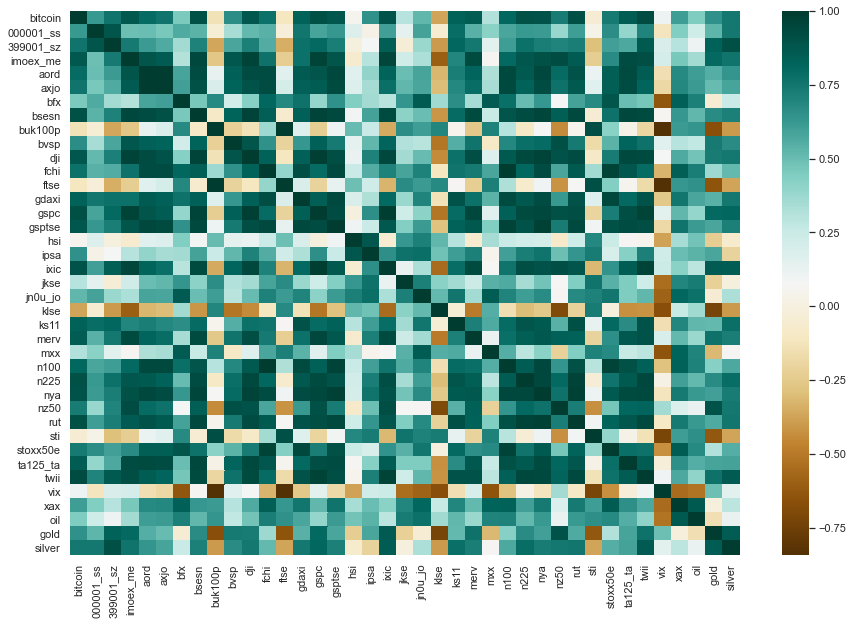

In [13]:
# correlation matrix between bitcoin, stock markets and commodities
data = coins_hist_prices[['date', 'bitcoin']].merge(world_indices, how='left', on='date').merge(commodities, how='left', on='date')
correlations_matrix = data.corr()
sns.heatmap(correlations_matrix, annot=False, cmap='BrBG')
sns.set(rc = {'figure.figsize':(15,10)})
plt.show()

In [14]:
s = correlations_matrix.unstack()
so = s.sort_values(kind="quicksort")
so = pd.DataFrame(so)
so = so.reset_index()
so.columns=['coin1', 'coin2', 'corr']
so[(so['corr']>0.85) & (so['coin1']=='bitcoin')]

,coin1,coin2,corr
1177,bitcoin,merv,0.850710
1181,bitcoin,ta125_ta,0.852558
1231,bitcoin,imoex_me,0.871265
1241,bitcoin,gsptse,0.877879
1243,bitcoin,dji,0.878715
1281,bitcoin,ixic,0.894822
1288,bitcoin,nya,0.896540
1305,bitcoin,bsesn,0.901549
1306,bitcoin,n225,0.902378
1319,bitcoin,gspc,0.907397


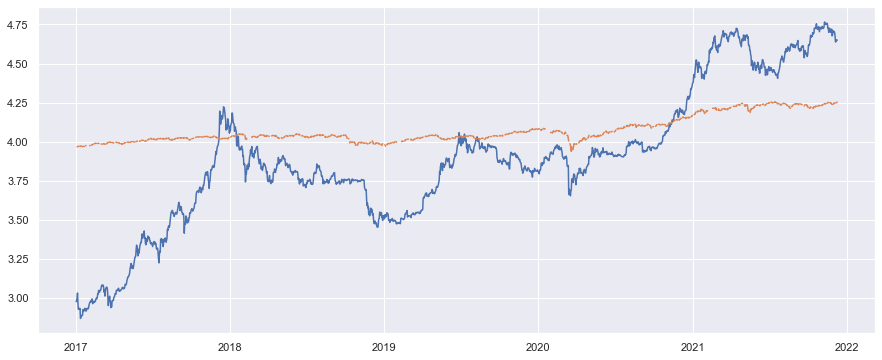

In [55]:
plt.figure(figsize=(15,6))
plt.plot(data['date'],data['bitcoin'].apply(lambda x:np.log10(x) if x>0 else x))
plt.plot(data['date'],data['^TWII'].apply(lambda x:np.log10(x) if x>0 else x))
plt.show()

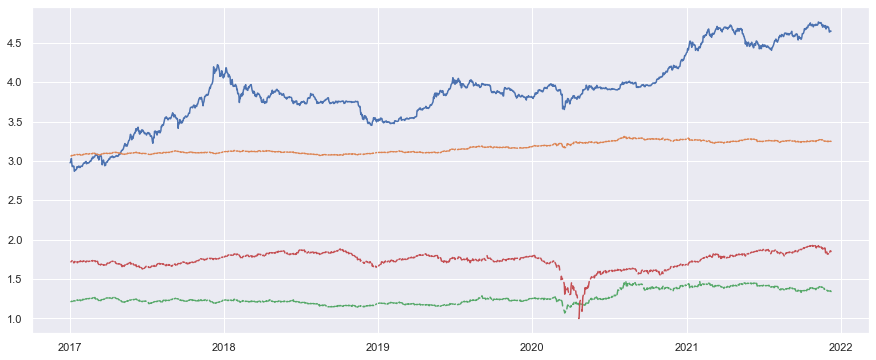

In [83]:
plt.figure(figsize=(15,6))
plt.plot(data['date'],data['bitcoin'].apply(lambda x:np.log10(x) if x>0 else x))
plt.plot(data['date'],data['gold'].apply(lambda x:np.log10(x) if x>0 else x))
plt.plot(data['date'],data['silver'].apply(lambda x:np.log10(x) if x>0 else x))
plt.plot(data['date'],data['oil'].apply(lambda x:np.log10(x) if x>0 else x))
plt.show()

### Pseudo API for Google Trends

In [ ]:
#!pip install pytrends

In [84]:
# API not working -> error 400
from pytrends.request import TrendReq

pytrends = TrendReq(hl='en-US', tz=360)
pytrends.get_historical_interest("Bitcoin", year_start=2021, month_start=1, day_start=1, hour_start=0, year_end=2018, month_end=2, day_end=1, hour_end=0, cat=0, geo='', gprop='', sleep=0)

The request failed: Google returned a response with code 400.
The request failed: Google returned a response with code 400.


""


In [8]:
# Another function from the same API
kw_list = ["bitcoin", "ethereum"] 
pytrends = TrendReq(hl='en-US', tz=360)
# build the payload
pytrends.build_payload(kw_list, timeframe='2021-01-01 2021-05-31', geo='US') 
df = pytrends.interest_over_time()
pytrends.build_payload(kw_list, timeframe='2021-06-01 2021-12-11', geo='US')
df = pd.concat([df, pytrends.interest_over_time()], axis=0)
df

,bitcoin,ethereum,isPartial
date,,,
2021-01-01,30,3,False
2021-01-02,52,5,False
2021-01-03,60,9,False
2021-01-04,53,11,False
2021-01-05,44,9,False
...,...,...,...
2021-12-06,52,14,False
2021-12-07,48,15,False
2021-12-08,41,13,False


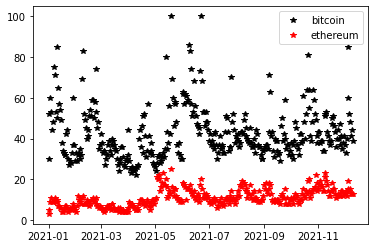

In [9]:
# plot all three trends in same chart
plt.figure()
plt.plot(df.index,df.bitcoin,'k*')
plt.plot(df.index,df.ethereum,'r*')
plt.legend(['bitcoin','ethereum'])

In [ ]:
# I dont use these values

### Fear and Greed Index API

In [136]:
import requests

data = requests.get('https://api.alternative.me/fng/?limit=2000')
data.json()

{'name': 'Fear and Greed Index',
 'data': [{'value': '28',
   'value_classification': 'Fear',
   'timestamp': '1639526400',
   'time_until_update': '45367'},
  {'value': '21',
   'value_classification': 'Extreme Fear',
   'timestamp': '1639440000'},
  {'value': '28', 'value_classification': 'Fear', 'timestamp': '1639353600'},
  {'value': '27', 'value_classification': 'Fear', 'timestamp': '1639267200'},
  {'value': '16',
   'value_classification': 'Extreme Fear',
   'timestamp': '1639180800'},
  {'value': '24',
   'value_classification': 'Extreme Fear',
   'timestamp': '1639094400'},
  {'value': '29', 'value_classification': 'Fear', 'timestamp': '1639008000'},
  {'value': '28', 'value_classification': 'Fear', 'timestamp': '1638921600'},
  {'value': '25',
   'value_classification': 'Extreme Fear',
   'timestamp': '1638835200'},
  {'value': '16',
   'value_classification': 'Extreme Fear',
   'timestamp': '1638748800'},
  {'value': '18',
   'value_classification': 'Extreme Fear',
   'times

In [137]:
feed_greed = pd.DataFrame(data.json().items()).transpose()
feed_greed = feed_greed.rename(columns=feed_greed.iloc[0]).iloc[1: , :]
feed_greed = pd.DataFrame(feed_greed.data.tolist(), index= feed_greed.index).transpose()
feed_greed = feed_greed[1].apply(pd.Series).drop(['time_until_update'], axis=1)

feed_greed['date'] = pd.to_datetime(feed_greed['timestamp'], unit='s')
feed_greed = feed_greed.drop(['timestamp'], axis=1)
feed_greed = feed_greed.rename({'value':'f&g_value'}, axis=1)
feed_greed

,f&g_value,value_classification,date
0,28,Fear,2021-12-15
1,21,Extreme Fear,2021-12-14
2,28,Fear,2021-12-13
3,27,Fear,2021-12-12
4,16,Extreme Fear,2021-12-11
...,...,...,...
1406,11,Extreme Fear,2018-02-05
1407,24,Extreme Fear,2018-02-04
1408,40,Fear,2018-02-03
1409,15,Extreme Fear,2018-02-02


In [138]:
feed_greed.to_csv('feed_greed.csv', index = False)

### PLOTS

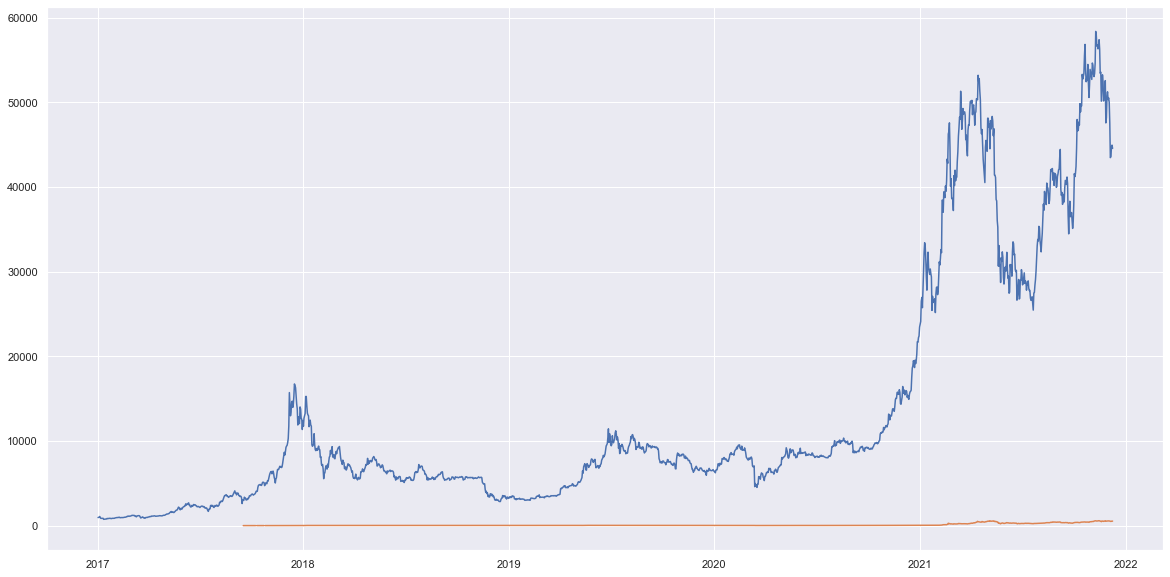

In [94]:
plt.figure(figsize=(20,10))
plt.plot(coins_hist_prices['date'],coins_hist_prices['bitcoin'])
plt.plot(coins_hist_prices['date'],coins_hist_prices['binancecoin'])
plt.show()

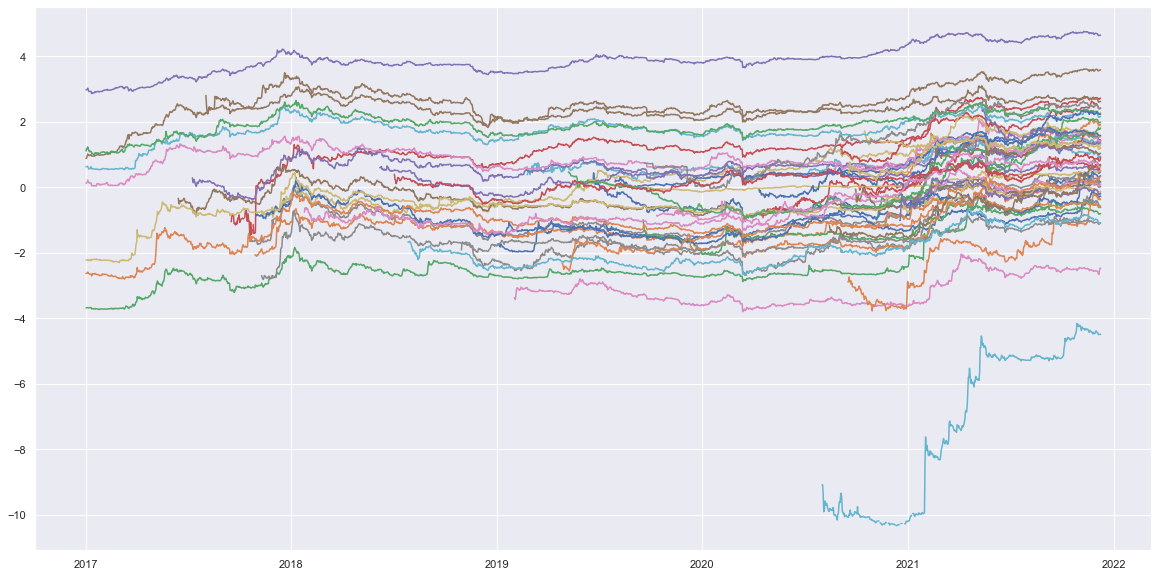

In [95]:
plt.figure(figsize=(20,10))

for col in coins_hist_prices.columns:
    if (col!='date'):
        plt.plot(coins_hist_prices['date'],coins_hist_prices[col].apply(lambda x:np.log10(x) if x>0 else x))
plt.show()


### Concatenating all the dataframes

In [147]:
data = coins_hist_prices.merge(world_indices, how='left', on='date')
data = data.merge(commodities, how='left', on='date')
data = data.merge(feed_greed[['date','f&g_value']], how='left', on='date')
data.sort_values(by='date')

,date,algorand,avalanche_2,axie_infinity,binancecoin,bitcoin,bitcoin_cash,bittorrent_2,cardano,chainlink,...,sti,stoxx50e,ta125_ta,twii,vix,xax,oil,gold,silver,f&g_value
0,2017-01-01,NaN,NaN,NaN,NaN,948.743300,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-01-02,NaN,NaN,NaN,NaN,973.780200,NaN,NaN,NaN,NaN,...,NaN,NaN,1280.420044,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-01-03,NaN,NaN,NaN,NaN,994.315600,NaN,NaN,NaN,NaN,...,2898.969971,3315.020020,1285.439941,9272.879883,12.850000,2325.129883,52.330002,1160.400024,16.356001,NaN
3,2017-01-04,NaN,NaN,NaN,NaN,1078.339639,NaN,NaN,NaN,NaN,...,2921.310059,3317.520020,1287.770020,9286.959961,11.850000,2334.260010,53.259998,1163.800049,16.499001,NaN
4,2017-01-05,NaN,NaN,NaN,NaN,934.261900,NaN,NaN,NaN,NaN,...,2954.139893,3316.469971,1290.660034,9358.139648,11.670000,2339.120117,53.759998,1179.699951,16.584000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1799,2021-12-05,1.456781,81.636887,104.106361,501.369726,43452.366271,415.246475,0.002308,1.254308,18.152414,...,NaN,NaN,1951.680054,NaN,NaN,NaN,NaN,NaN,NaN,18
1800,2021-12-06,1.545328,75.783768,94.818492,491.696726,43584.415788,400.257578,0.002185,1.217181,17.138638,...,3116.320068,4137.109863,1966.839966,17688.210938,27.180000,3385.449951,69.489998,1777.500000,22.228001,16
1801,2021-12-07,1.587568,82.339813,93.948477,521.502719,44721.774318,420.936333,0.002987,1.256403,17.566595,...,3134.659912,4276.200195,2003.239990,17796.919922,21.889999,3432.669922,72.050003,1782.599976,22.487000,25
1802,2021-12-08,1.498819,79.761242,93.917669,513.203737,44927.870835,420.340803,0.003413,1.227976,18.456450,...,3129.770020,4233.089844,1993.469971,17832.419922,19.900000,3430.610107,72.360001,1783.400024,22.389999,28


In [148]:
data.to_csv('data.csv', index = False)

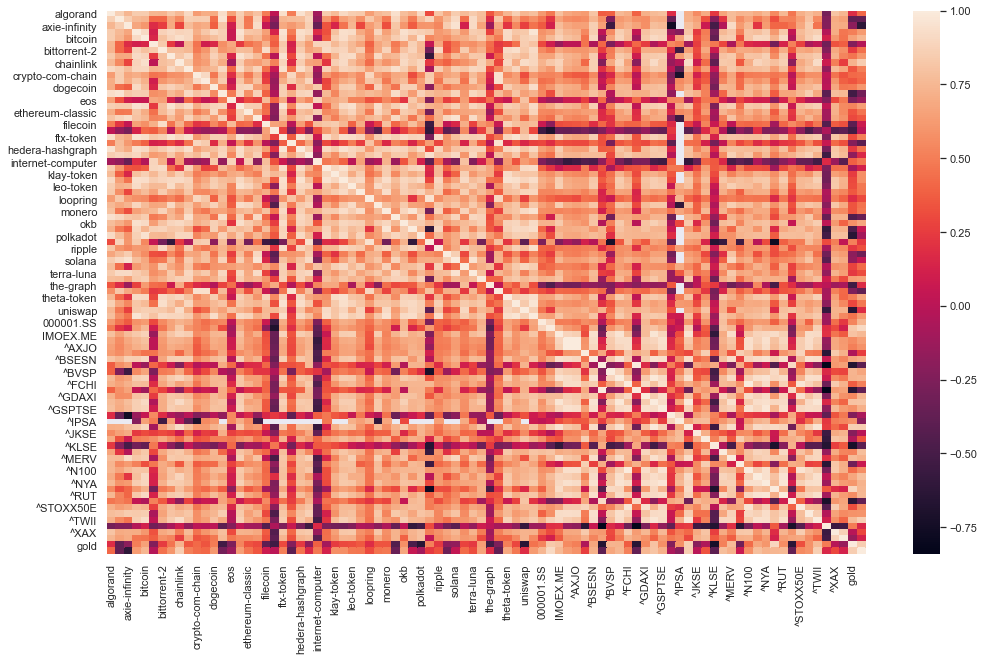

In [102]:
correlations_matrix = data.corr()
sns.heatmap(correlations_matrix, annot=False)
sns.set(rc = {'figure.figsize':(17,10)})
plt.show()

## Time Series Analysis

### Prophet library

In [ ]:
# !pip install pystan==2.19.1.1
# !pip install prophet


In [16]:
from fbprophet import Prophet

df = data[["date", "bitcoin"]]
df.columns = ["ds", "y"]
df

Importing plotly failed. Interactive plots will not work.


,ds,y
0,2017-01-01,948.743300
1,2017-01-02,973.780200
2,2017-01-03,994.315600
3,2017-01-04,1078.339639
4,2017-01-05,934.261900
...,...,...
1799,2021-12-05,43452.366271
1800,2021-12-06,43584.415788
1801,2021-12-07,44721.774318
1802,2021-12-08,44927.870835


In [17]:
prophet = Prophet()
prophet.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [18]:
future = prophet.make_future_dataframe(periods=365)
print(future)

             ds
0    2017-01-01
1    2017-01-02
2    2017-01-03
3    2017-01-04
4    2017-01-05
...         ...
2164 2022-12-05
2165 2022-12-06
2166 2022-12-07
2167 2022-12-08
2168 2022-12-09

[2169 rows x 1 columns]


In [19]:
forecast = prophet.predict(future)
forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail(10)

,ds,yhat,yhat_lower,yhat_upper
2159,2022-11-30,82280.295817,71939.835410,91368.206799
2160,2022-12-01,82384.712884,73146.285657,90959.512486
2161,2022-12-02,82420.970233,72555.615103,92096.369746
2162,2022-12-03,82523.836778,72198.087510,91638.296607
2163,2022-12-04,82595.753719,72779.566032,91130.880169
2164,2022-12-05,82661.973146,73191.938971,92385.297650
2165,2022-12-06,82766.666447,73734.525137,92373.453040
2166,2022-12-07,82822.563592,72406.776303,91319.546982
2167,2022-12-08,82987.472205,72701.638533,92116.388248
2168,2022-12-09,83089.430994,72747.183431,91871.211253


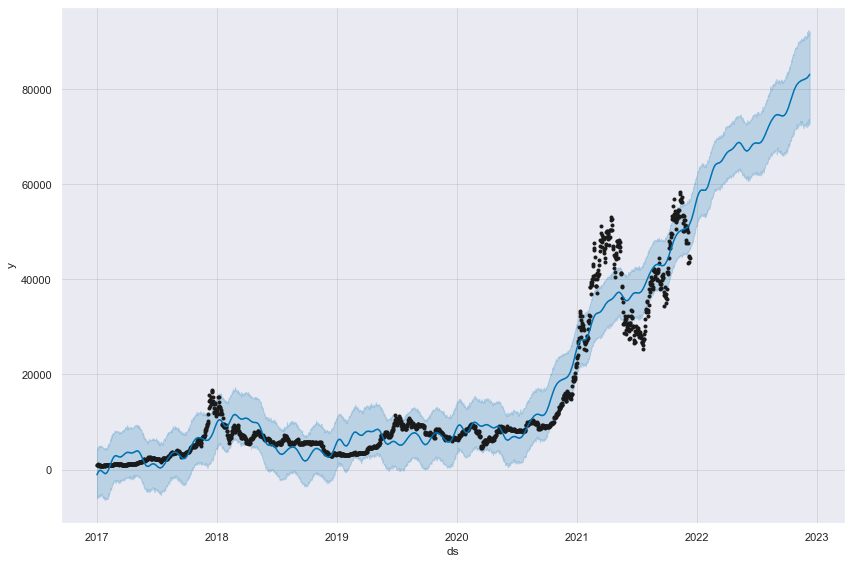

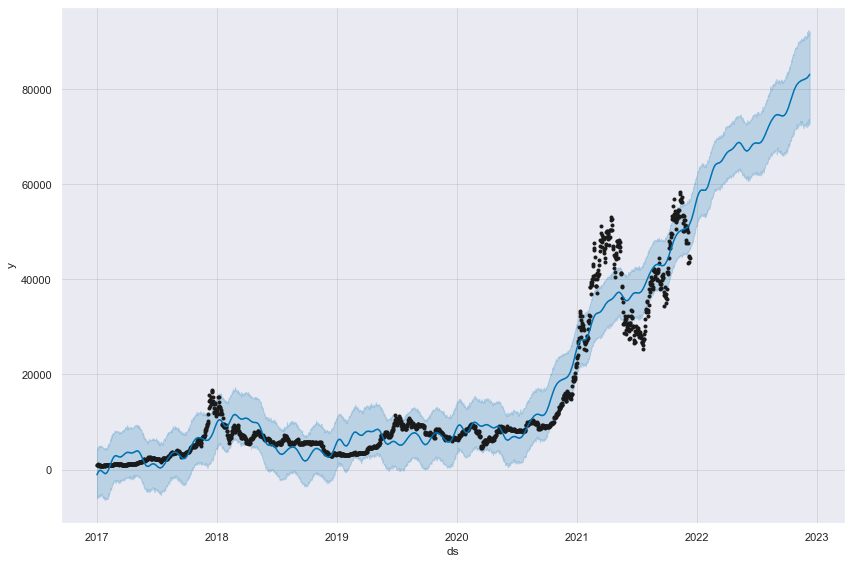

In [20]:
from fbprophet.plot import plot
prophet.plot(forecast, figsize=(12, 8))

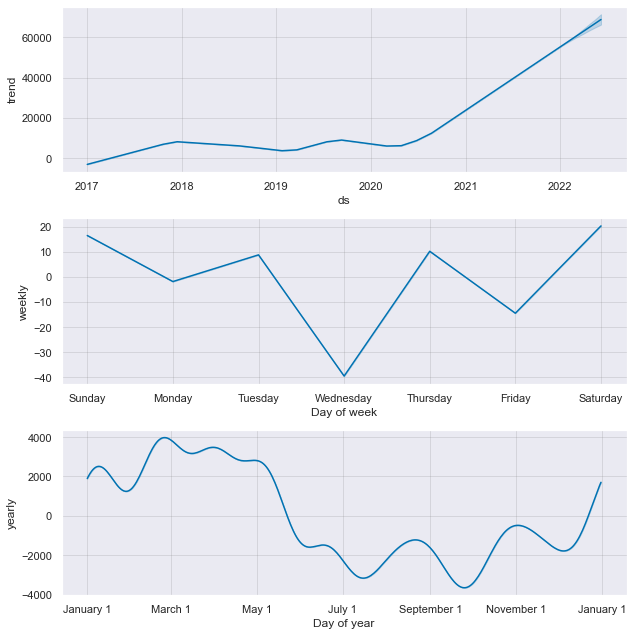

In [154]:
fig2 = prophet.plot_components(forecast)

In [110]:
from fbprophet import Prophet

df = data[["date", "ethereum"]]
df.columns = ["ds", "y"]
df

,ds,y
0,2017-01-01,7.666365
1,2017-01-02,7.988684
2,2017-01-03,9.243632
3,2017-01-04,10.462767
4,2017-01-05,9.539322
...,...,...
1799,2021-12-05,3625.294474
1800,2021-12-06,3714.187721
1801,2021-12-07,3853.091743
1802,2021-12-08,3823.903672


In [111]:
prophet = Prophet()
prophet.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [112]:
future = prophet.make_future_dataframe(periods=30)
print(future)

             ds
0    2017-01-01
1    2017-01-02
2    2017-01-03
3    2017-01-04
4    2017-01-05
...         ...
1829 2022-01-04
1830 2022-01-05
1831 2022-01-06
1832 2022-01-07
1833 2022-01-08

[1834 rows x 1 columns]


In [113]:
forecast = prophet.predict(future)
forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail(10)

,ds,yhat,yhat_lower,yhat_upper
1824,2021-12-30,3976.738161,3754.664586,4187.373219
1825,2021-12-31,3993.761924,3777.346509,4217.806460
1826,2022-01-01,4011.293115,3791.174052,4242.227516
1827,2022-01-02,4031.242934,3804.795875,4247.101967
1828,2022-01-03,4050.842840,3820.125824,4270.264626
1829,2022-01-04,4069.815047,3839.812127,4283.472118
1830,2022-01-05,4085.900768,3862.485875,4307.766323
1831,2022-01-06,4105.637180,3878.789110,4326.417704
1832,2022-01-07,4120.916050,3887.866466,4350.712779
1833,2022-01-08,4135.945056,3908.469662,4356.941226


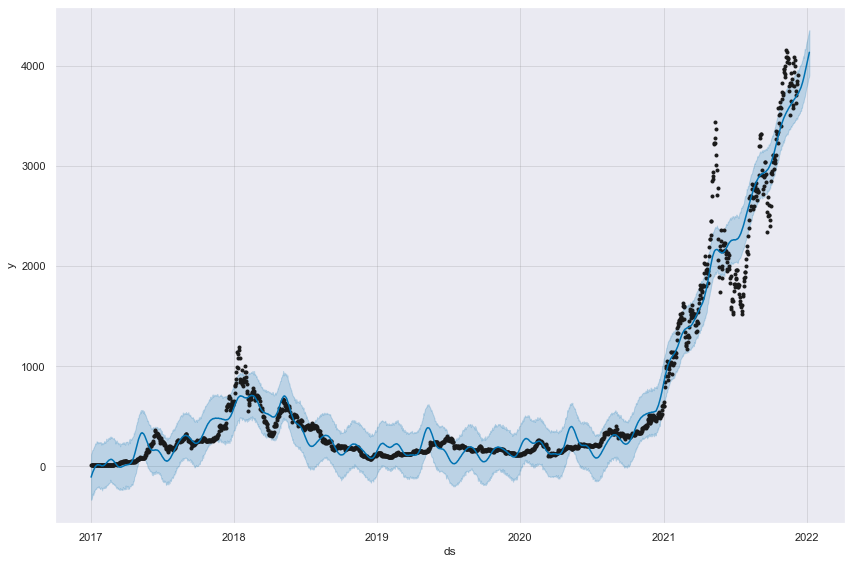

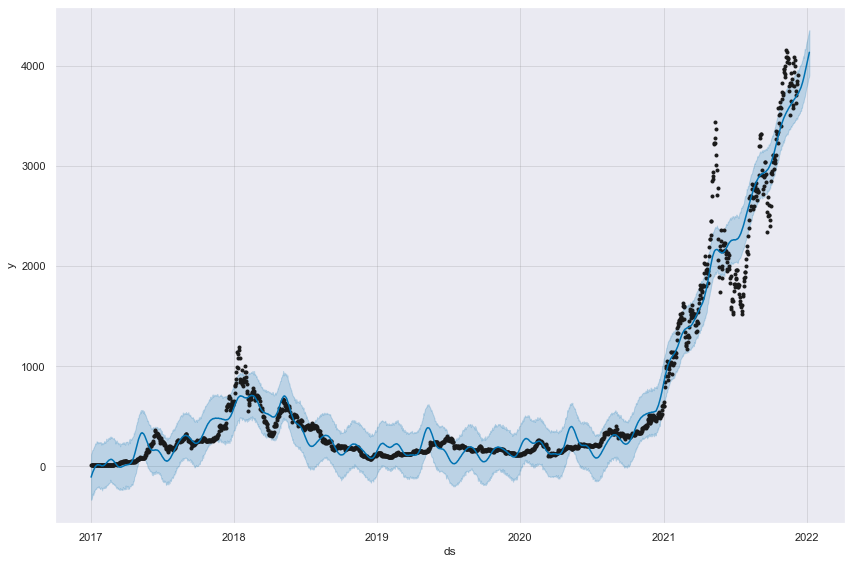

In [114]:
from fbprophet.plot import plot
prophet.plot(forecast, figsize=(12, 8))

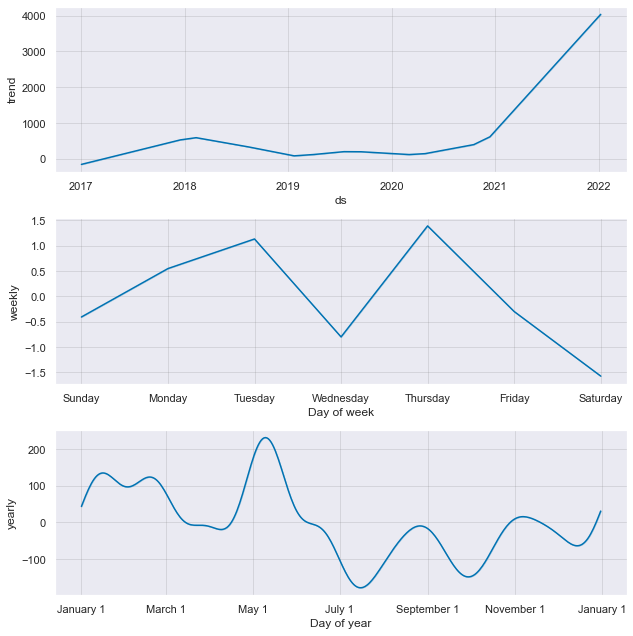

In [115]:
fig2 = prophet.plot_components(forecast)

In [125]:
from fbprophet import Prophet

df = data[["date", "binancecoin"]]
df.columns = ["ds", "y"]
df = df.dropna()
df

,ds,y
258,2017-09-16,0.089787
259,2017-09-17,0.129067
260,2017-09-18,0.145059
261,2017-09-19,0.140337
262,2017-09-20,0.140344
...,...,...
1799,2021-12-05,501.369726
1800,2021-12-06,491.696726
1801,2021-12-07,521.502719
1802,2021-12-08,513.203737


In [126]:
prophet = Prophet()
prophet.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [127]:
future = prophet.make_future_dataframe(periods=365)
print(future)

             ds
0    2017-09-16
1    2017-09-17
2    2017-09-18
3    2017-09-19
4    2017-09-20
...         ...
1569 2022-01-04
1570 2022-01-05
1571 2022-01-06
1572 2022-01-07
1573 2022-01-08

[1574 rows x 1 columns]


In [128]:
forecast = prophet.predict(future)
forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail(10)

,ds,yhat,yhat_lower,yhat_upper
1564,2021-12-30,518.744733,467.371798,576.063013
1565,2021-12-31,519.887111,466.372858,568.889154
1566,2022-01-01,521.458398,468.923562,573.908546
1567,2022-01-02,522.415330,471.966891,576.696847
1568,2022-01-03,523.836667,470.623584,575.219586
1569,2022-01-04,525.487962,473.908860,577.132365
1570,2022-01-05,526.702809,476.525324,584.263699
1571,2022-01-06,528.358416,478.688415,579.756006
1572,2022-01-07,529.626486,481.394151,581.019668
1573,2022-01-08,531.260309,480.638743,583.525460


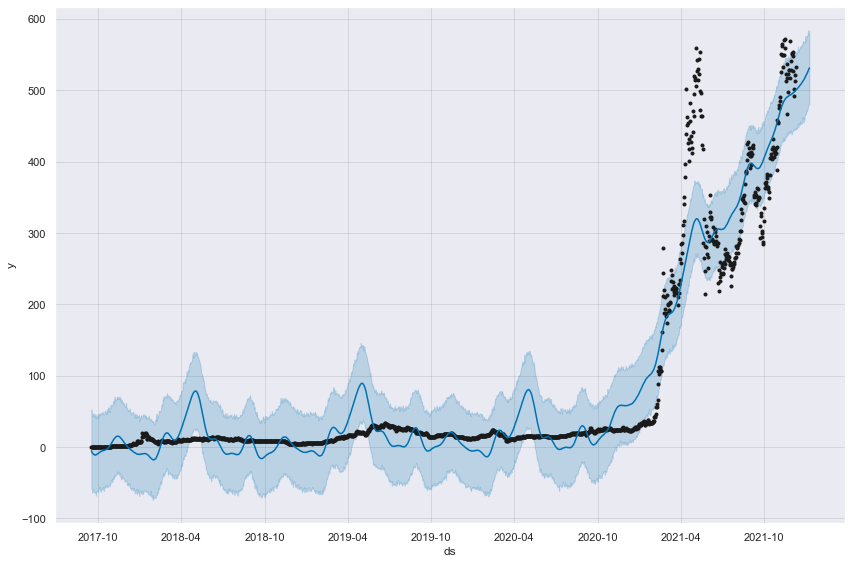

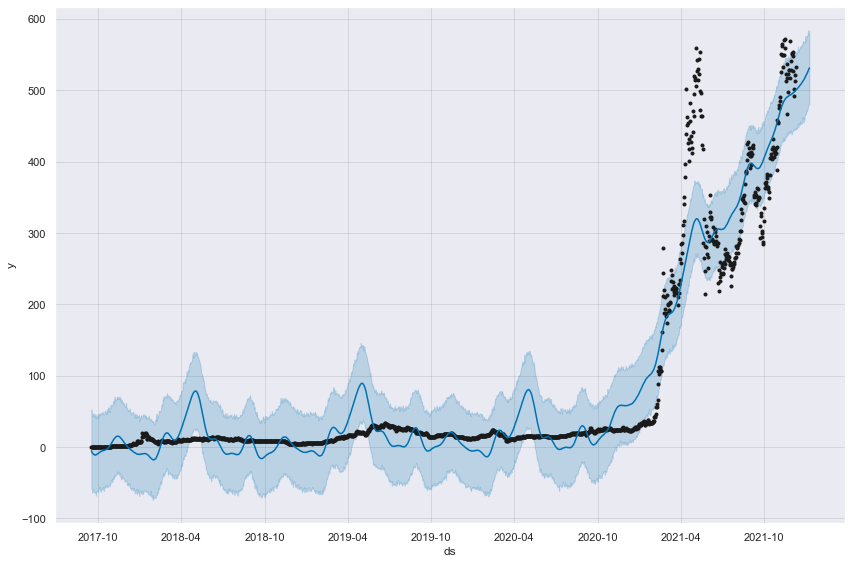

In [129]:
from fbprophet.plot import plot
prophet.plot(forecast, figsize=(12, 8))

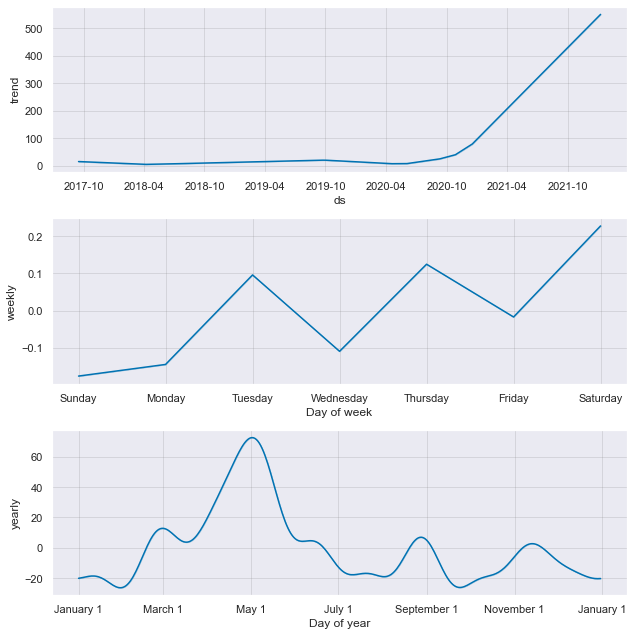

In [130]:
fig2 = prophet.plot_components(forecast)

### NeuralProphet

In [ ]:
#!pip install neuralprophet[live]

INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO:NP.utils:Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO:NP.config:Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 156
INFO:NP.config:Auto-set epochs to 156


  0%|          | 0/262 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 4.89E-02, min: 6.72E-01
INFO:NP.utils_torch:lr-range-test results: steep: 4.89E-02, min: 6.72E-01


  0%|          | 0/262 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 4.89E-02, min: 1.89E+00
INFO:NP.utils_torch:lr-range-test results: steep: 4.89E-02, min: 1.89E+00


  0%|          | 0/262 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 5.74E-02, min: 1.37E+00
INFO:NP.utils_torch:lr-range-test results: steep: 5.74E-02, min: 1.37E+00
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 5.16E-02
INFO:NP.forecaster:lr-range-test selected learning rate: 5.16E-02
Epoch[156/156]: 100%|████| 156/156 [00:31<00:00,  4.93it/s, SmoothL1Loss=0.00332, MAE=2.81e+3, RMSE=3.76e+3, RegLoss=0]


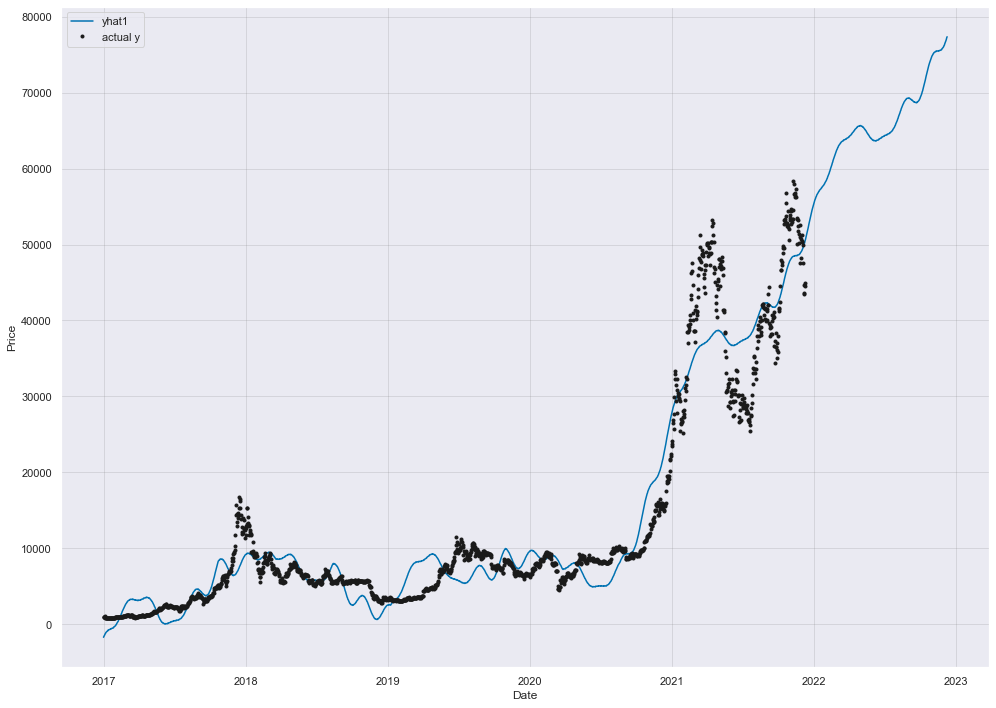

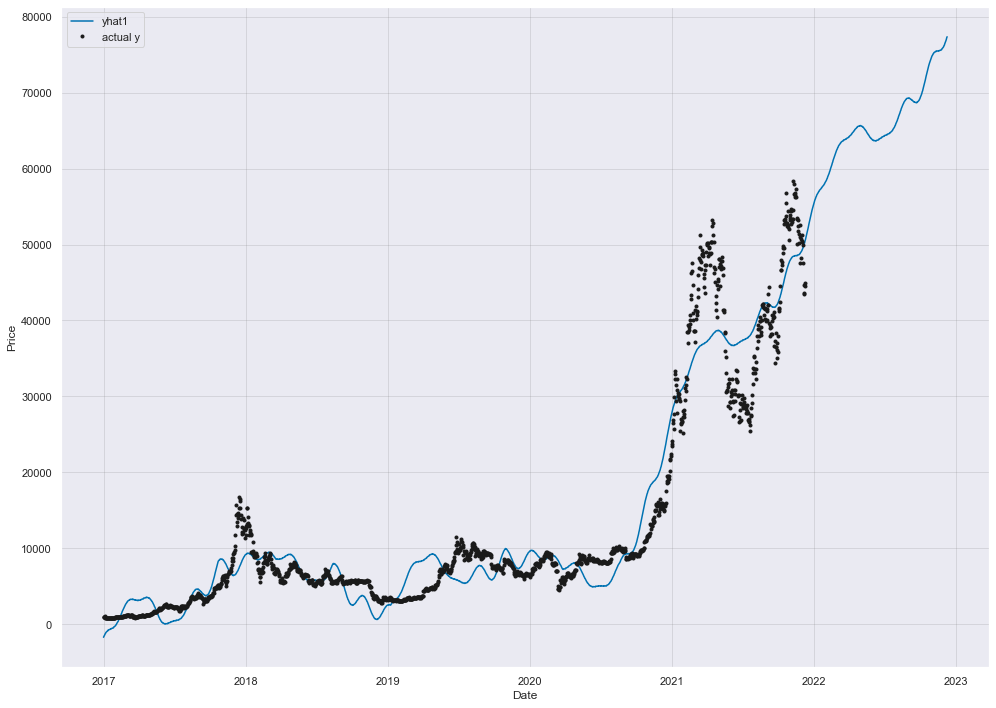

In [161]:
from neuralprophet import NeuralProphet

df = data[["date", "bitcoin"]]
df.columns = ["ds", "y"]

model = NeuralProphet()
metrics = model.fit(df, freq="D")
future = model.make_future_dataframe(df, periods=365, n_historic_predictions=len(df))
forecast = model.predict(future)
fig, ax = plt.subplots(figsize=(14, 10))
model.plot(forecast, xlabel="Date", ylabel="Price", ax=ax)

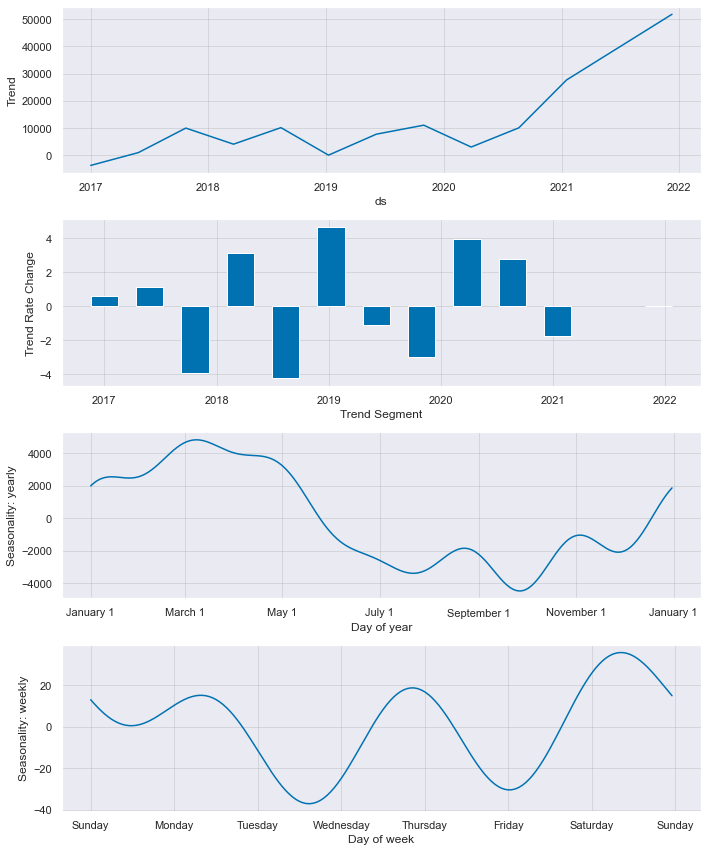

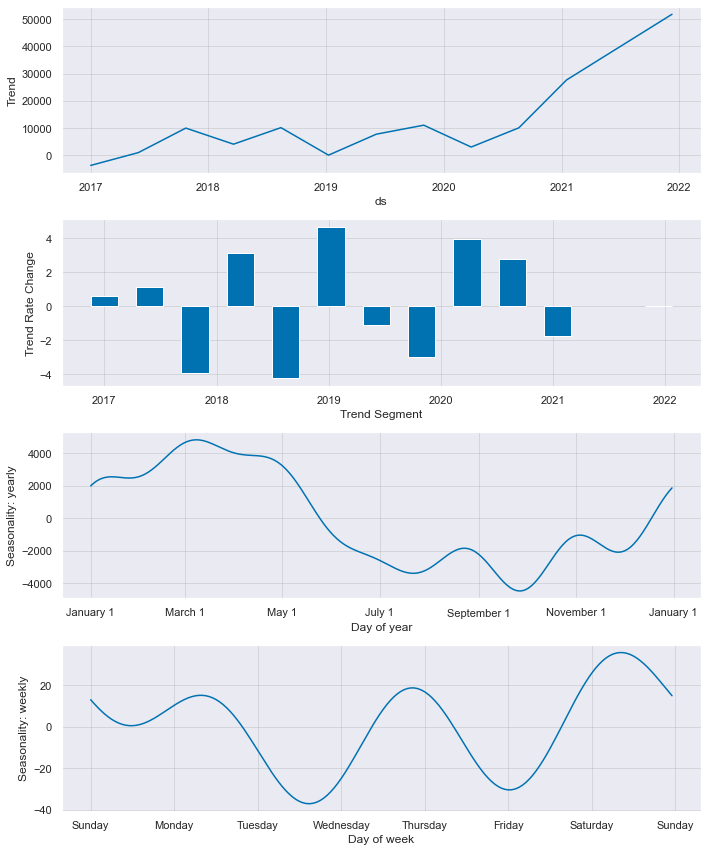

In [162]:
model.plot_parameters()